# NASA Ocean Color Data from MODIS-Aqua

The following notebook will walk readers through how to access ocean color data from the NASA repository and make some basic plots projected onto a map. I suggest that readers walk through the code first using the examples given, and second following the "make it your own" steps to create a unique figure.

Data for this notebook is pulled from NASA's main repository: https://oceandata.sci.gsfc.nasa.gov/opendap/

This repository holds global data collected by nine different satellites. Here, data from MODIS-Aqua (MODIS-A) satellite will be used. Data for each satellite is processed by NASA at three different levels. This notebook uses level three data which has already gone through a fair amount of processing and is gridded conveniently.

### credit:
This lession is based on one from Tom Connolly: https://github.com/tompc35/oceanography-notebooks/blob/master/ocean_color_netcdf.ipynb

In [15]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

%matplotlib inline 

## Accessing Data Through Thredd Server
use xr.open_dataset() to load metadata from the NASA repository online

As an example, here is a url for data from 2019-09-06:

```python
url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
ds = xr.open_dataset(url)
```
'lazy data' --> at first, xarray's 'open_dataset()' command will only pull down the "metadata", not the whole set.
This will allow us to learn about the size, parameters, and bounds of this dataset before trying to access the whole data set.

To determine how large the dataset is, use
```python
print('data size:',ds.nbytes/1e6, 'MB')
```
This will print out the size of the dataset in MegaBites. Turns out this one is quite large, containing data from everywhere on the globe for July 28th 2019. Therefore, it will be beneficial to further subset the data before trying to plot it.

#### make it your own
Try accessing data from a different day of the year. Go to
https://oceandata.sci.gsfc.nasa.gov/opendap/MODISA/L3SMI/2019/contents.html
and look at the list of dates where data is available. (Note that the dates are not in order). In the above example, dataset number 210 was accessed, "oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/**2019**/**210**", which is the 6th of September 2019, and then "A2019**210**.L3m_DAY_CHL_clor_a_4km.nc" was chosen, which are the chlorophyll a measurements at 4km resolution. Other resolutions and variables are available from this satellite.

In [16]:
url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
ds = xr.open_dataset(url)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 149.351808 MB


<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 4320, lon: 8640, rgb: 3)
Coordinates:
  * lat      (lat) float32 89.979164 89.9375 89.89583 ... -89.93751 -89.97918
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chlor_a  (lat, lon) float32 ...
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2019210.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.0
    date_created:                      2019-09-05T22:57:04.000Z
    history:                           l3ma

## Subsetting the Data
Over 100 MB is way too much data to load. Let's subset this global dataset into a region of interest.

As an example, we will subset just the data from the Mid Atlantic Bite around New Jersey. 
```python
data_mab_nj = data.sel( lat=slice(41, 38), lon=slice(-76,-71))
# For some unknown reason, the lat coordinates are listed high to low instead of low to high
```
When using the 'sel' and 'slice' functions on an xarray, make sure that the variables you are slicing are exactly as they appear in the xarray. For example, if you wrote data_mab_nj = data.sel( latitude=slice(41, 38), longitude=slice(-76,-71),  xarray would not know what you were refering to because 'latitude' and 'longitude' are abbreviated 'lat' and 'lon' in the xarray. (Look at the coordinates of our printed xarray above!)

#### make it your own
Try accessing data from a different area of the world. To find the Latitude and Longitude ranges for your desired area I recommend using www.bboxfinder.com .

In [17]:
data_mab_nj = ds.sel( lat=slice(41, 38), lon=slice(-76,-71))
print('data size:',data_mab_nj.nbytes/1e6, 'MB')
data_mab_nj

data size: 0.036096 MB


<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 72, lon: 120, rgb: 3)
Coordinates:
  * lat      (lat) float32 40.979168 40.9375 40.895832 ... 38.0625 38.020832
  * lon      (lon) float32 -75.979164 -75.93749 ... -71.06249 -71.02083
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chlor_a  (lat, lon) float32 ...
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2019210.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.0
    date_created:                      2019-09-05T22:57:04.000Z
    history:                           l3mapgen

## Plotting Chlorophyll a

Now that 'data_mab_nj' is of a a manageable size, this data can be used to make a figure. Once the data is called upon to make a figure, xarray will load all of the data you asked for, not just the "metadata".

Xarray has several built-in xarray plotting routines. We can use this function to plot the variable 'chlor_a'. Xarray will automatically against the dimensions of the xarray (denoted by * in the xarray, in this case the dimensions are lat and lon).
```python
data_mab_nj.chlor_a.plot()
```
With the above piece of code, xarray will use a default colorscale and the entire range of the data. However, to custimize your figure to show the information you find interesting, you can add ranges to your colorbar and use different colormaps if desired.
```python
data_mab_nj.chlor_a.plot(cmap='viridis', vmin = 0, vmax= 10)
```

#### make it your own
If you play around with plotting subsets of different regions, you may find that some areas of the world have a lot more data points than others, why might this be? Try finding a spring bloom of Chlorophyll a or another fall bloom.

find lists of different colormap options for matplotlib here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

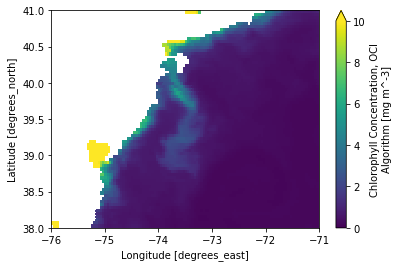

In [4]:
data_mab_nj.chlor_a.plot(vmin = 0, vmax = 10)

## Plotting on a Log Scale
Chlorophyll a data is best respresented on a logarithmic scale. Numpy can easily fit our chlor_a data onto a log10 scale:

```python
plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, np.log10(data_mab_nj.chlor_a))
plt.colorbar()
```
When these values are plotted on a log10 scale, distinct features at small values of chlor_a can be seen without changing the bounds of the chlor_a data. We can now see a larger eddy in the bottom right of the example figure!

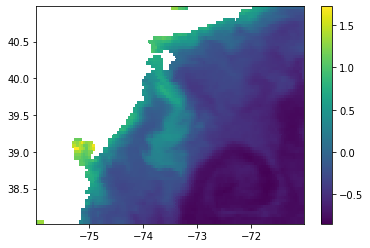

In [5]:
plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, np.log10(data_mab_nj.chlor_a))
plt.colorbar()

## Adding the Coastlines
To make our figure looke more like a map, use the cartopy import to add coastlines to the figure. Remember that cartopy.crs was imported as ccrs.

Coastlines should appear as a black line. Now it is evident which blank spots appear over land and which appear for another reason, such as too much cloud coverage.

I found that the pcolor function showed the best resolution of this dataset. This function can use cartopy through matplotlib and shows the amount of chlorophyll in each pixel of data.
```python
plt.pcolor(lon, lat, chlor_a, transform = data_crs)
```
Learn more about the parameters of pcolor here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html

There are several other plotting functions that also work in tandem with these two libraries. The "contourf" function creates a smoother looking image by averaging pixels into contour lines and then filling in the space between contours with the same color. 
```python
chlor_a = chlor_a.where(chlor_a < 10)
plt.contourf(lon, lat, chlor_a, transform = data_crs)
# for this function, putting a bound on the chlorophyll a variable works better than setting a vmax
## any conditional statement can be used as a parameter of the 'where' function.
```

Check out all of the parameters that contourf has at: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html

#### make it your own
What range of chlorophyll a amounts allows you to depict something interesting in your data slice? Play around with the limit of this variable
```python
plt.pcolor(lon, lat, chlor_a, transform = data_crs, vmin= 0, vmax=10)
```
(vmin and vmax) and see what appears in your figure.

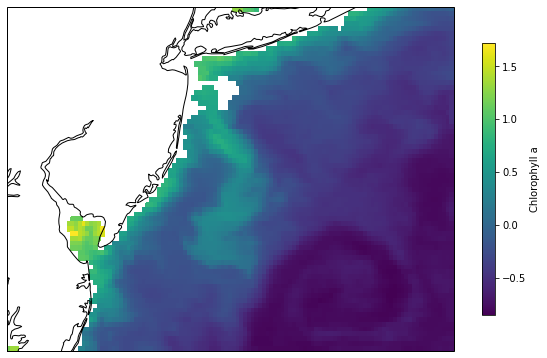

In [18]:
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()
# This is the prjection that tends to work in mid-latitudes, abbreviated into convenient variables
## Closer to the poles, a different projection might be needed

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)
# 'ax' is the axis of the figure, a variable that has to be defined from matplotlib
## cartopy adds to matplotlib, so that matplotlib now has the ability to set a 'projection' of lat and lon onto a map

# defining the variables to plot
## using numpy to plot a log10 scale of chlor_a
chlor_a = np.log10(data_mab_nj.chlor_a)
lat = data_mab_nj.lat
lon = data_mab_nj.lon

plt.pcolor(lon, lat, chlor_a, transform = data_crs)
# Becuase in this example, an offshore fall bloom is of interest, max and mins of the colormap were set
## This skews the color scale so that smaller differences in offshore chlorophyll can be seen

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

## Checking out Another Point in Time
The same steps can be taken for a different day of the year. The following code is a condenced version of everything above, but accesses data from September 11th 2019, five days after the first figure that was made.

It looks like this day has less data available, perhaps due to cloud coverage or the orbit of the satellite on this day. However, chlorophyll a blooms can still be seen making their way off the east coast of the US.

data size: 149.351808 MB
data size: 0.036096 MB


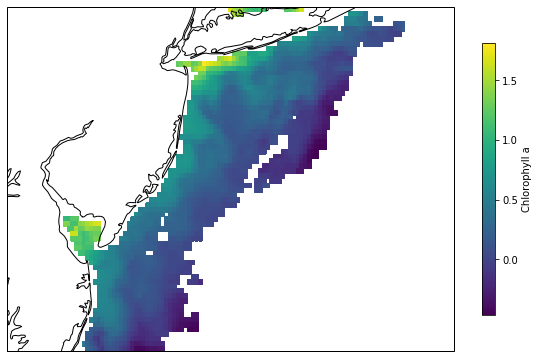

In [19]:
# Accessing data and slicing the mid atlantic bight
url2 = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/177/A2019177.L3m_DAY_CHL_chlor_a_4km.nc'
ds2 = xr.open_dataset(url2)
print('data size:',ds2.nbytes/1e6, 'MB')
data_mab_nj2 = ds2.sel( lat=slice(41, 38), lon=slice(-76,-71))
print('data size:',data_mab_nj2.nbytes/1e6, 'MB')

# Setting projections and axes
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()
plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)

# define variables of interest
chlor_a = np.log10(data_mab_nj2.chlor_a)
lat = data_mab_nj2.lat
lon = data_mab_nj2.lon

# create figure and axes
plt.pcolor(lon, lat, chlor_a, transform = data_crs)
ax.coastlines('10m')
plt.colorbar(label = 'Chlorophyll a', shrink=0.5)
plt.show()

data size: 149.351808 MB
data size: 0.036096 MB


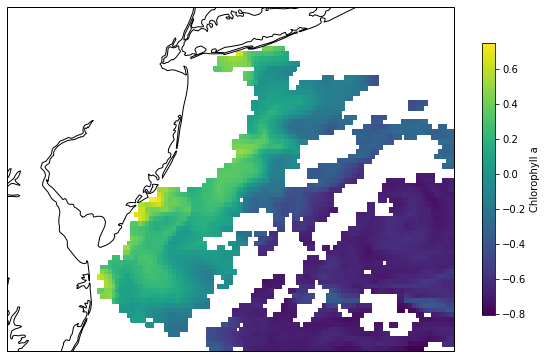

In [20]:
# Accessing data and slicing the mid atlantic bight
url3 = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/187/A2019187.L3m_DAY_CHL_chlor_a_4km.nc'
ds3 = xr.open_dataset(url3)
print('data size:',ds3.nbytes/1e6, 'MB')
data_mab_nj3 = ds3.sel( lat=slice(41, 38), lon=slice(-76,-71))
print('data size:',data_mab_nj3.nbytes/1e6, 'MB')

# Setting projections and axes
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()
plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)

# define variables of interest
chlor_a = np.log10(data_mab_nj3.chlor_a)
lat = data_mab_nj3.lat
lon = data_mab_nj3.lon

# create figure and axes
plt.pcolor(lon, lat, chlor_a, transform = data_crs)
ax.coastlines('10m')
plt.colorbar(label = 'Chlorophyll a', shrink=0.5)
plt.show()

Here is a piece of code that opens each file and determines if there's enough data in the region you are interested in

In [21]:
base_url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019'

# pick out days, the syntax is start day, stop day, last thing is the number of steps between
days = np.arange(1, 300, 10)

# for each yearday indicated in the 'days' list, open and and print the http address and add it to the list 'files'
files = [f'{base_url}/{str(day).zfill(3)}/A2019{str(day).zfill(3)}.L3m_DAY_CHL_chlor_a_4km.nc' for day in days]

files

['https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/001/A2019001.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/011/A2019011.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/021/A2019021.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/031/A2019031.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/041/A2019041.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/051/A2019051.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/061/A2019061.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/071/A2019071.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/081/A2019081.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://

In [22]:
# only concat the chla, then only grab it, and subset to MAB:

ds = xr.open_mfdataset(files, concat_dim = days, data_vars=['chlor_a']).sel( lat=slice(41, 38), lon=slice(-76,-71))
ds = ds.rename({'concat_dim': 'days'})
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 1.038576 MB


/Users/jveatch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jveatch/opt/anaconda3/lib/python3.7/site-packages/xarray/core/combine.py:797: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if concat_dim == "_not_supplied":
/Users/jveatch/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdata

<xarray.Dataset>
Dimensions:  (days: 30, eightbitcolor: 256, lat: 72, lon: 120, rgb: 3)
Coordinates:
  * lat      (lat) float32 40.979168 40.9375 40.895832 ... 38.0625 38.020832
  * lon      (lon) float32 -75.979164 -75.93749 ... -71.06249 -71.02083
  * days     (days) int64 1 11 21 31 41 51 61 71 ... 231 241 251 261 271 281 291
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 dask.array<chunksize=(3, 256), meta=np.ndarray>
    chlor_a  (days, lat, lon) float32 dask.array<chunksize=(1, 72, 120), meta=np.ndarray>
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2019001.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    tempora

In [26]:
ds_last = ds.days.max()
print('last day data size:', ds_last.nbytes/1e6, 'Mb')

nobs = ds_last.chlor_a.count('days')

nobs = nobs.where(nobs > 0)

nobs

last day data size: 8e-06 Mb


AttributeError: 'DataArray' object has no attribute 'chlor_a'